### Student Admission Classification with Logistic Regression

##### Goal: Predict whether a student gets admitted to university based on exam scores.
##### Algorithm: Logistic Regression

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D



In [3]:
#loading the data 
path = r"C:\Users\bbuser\Downloads\student_admission_dataset.csv"
df=pd.read_csv(path)
df 

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


### Data exploraty ERD

In [5]:
df.shape
df.info()
df.describe()
df.tail()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


Index(['GPA', 'SAT_Score', 'Extracurricular_Activities', 'Admission_Status'], dtype='object')

### null, duplicates 

In [6]:
df.duplicated().sum()
df.isnull().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

### feature engineering 

In [8]:
#feature engineering
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Admission_Status'] = encoder.fit_transform(df['Admission_Status'])
print(df.head())
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


    GPA  SAT_Score  Extracurricular_Activities  Admission_Status
0  3.46       1223                           8                 1
1  2.54        974                           8                 1
2  2.91        909                           9                 1
3  2.83       1369                           5                 0
4  3.60       1536                           7                 0
{'Accepted': np.int64(0), 'Rejected': np.int64(1), 'Waitlisted': np.int64(2)}


### preparing for modelling

In [9]:
#preparing for modelling
X = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = df['Admission_Status']

### logistic regression training 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
#model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.34


### evaluate preformance

In [12]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.34
              precision    recall  f1-score   support

           0       0.36      0.57      0.44        14
           1       0.39      0.39      0.39        18
           2       0.20      0.11      0.14        18

    accuracy                           0.34        50
   macro avg       0.32      0.36      0.33        50
weighted avg       0.31      0.34      0.32        50

[[8 3 3]
 [6 7 5]
 [8 8 2]]


### desision 

In [15]:
feature1 = 'GPA'
feature2 = 'SAT_Score'
fixed_value = X_train[:, 2].mean()
#----------------------------------------------------------
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, fixed_value)]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

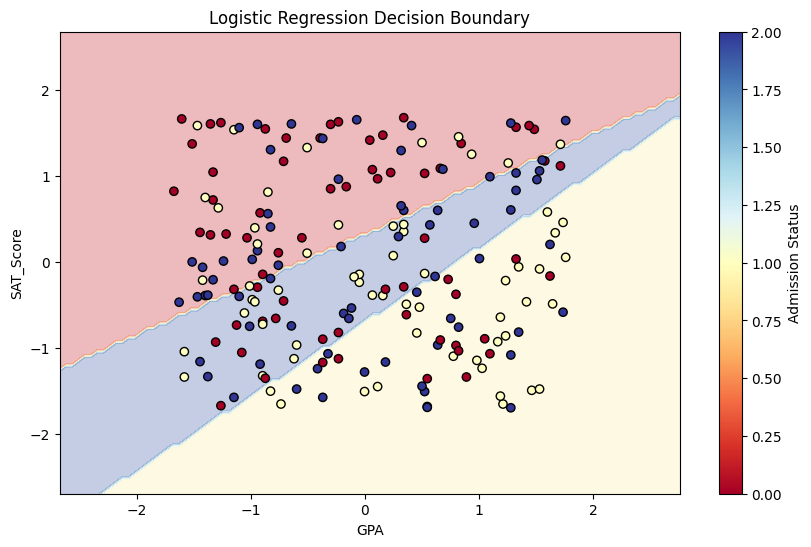

In [16]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(scatter, label='Admission Status')
plt.show()